


CARGO LAS LIBRERIAS


In [2]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay,
                             f1_score, precision_score, recall_score)
from sklearn.model_selection import (GridSearchCV, RepeatedStratifiedKFold,
                                     cross_val_score, train_test_split)
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import SVC

CARGO LOS DATOS

In [4]:
# Cargar el dataset
df = pd.read_csv('/content/sample_data/water_potability_clasificar.csv')

# Eliminar filas con valores nulos
df = (df.drop(columns=['ph'])).dropna()


# 3. Separar las características (X) de la columna objetivo (y)
X = df.iloc[:, :-1]  # Todas las columnas excepto la última
y = df.iloc[:, -1]   # La última columna (clase objetivo)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mostrar tipos de datos de cada columna
print("\nTipos de datos:")
print(df.dtypes)



Tipos de datos:
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object


BAYES

In [5]:
accuracy_b = 0
def bayes_conjunto_con_entrenamiento(tamanio_test, umbral):

    global accuracy_b
    # Variables de X e Y de entrenamiento y de testeo
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=tamanio_test, random_state=42)

    # Crear el modelo Naive Bayes
    gnb = GaussianNB()

    # Entrenar el modelo
    gnb.fit(x_train, y_train)

    # Predecir las clases del conjunto de prueba
    y_pred = gnb.predict(x_test)

    # Predecir las probabilidades de cada clase
    probas = gnb.predict_proba(x_test)

    # Inicializar un arreglo para las predicciones con corte de umbral
    y_pred_custom = np.zeros(y_test.shape)

    # Aplicar el corte (Umbral)
    for i in range(probas.shape[0]):
        if probas[i, 0] > umbral:  # Si la probabilidad de ser 0 es mayor que el umbral
            y_pred_custom[i] = 0  # Clasificar como 0
        else:
            y_pred_custom[i] = 1  # Clasificar como 1

    # Evaluar la precisión del modelo con el nuevo corte
    accuracy_custom = accuracy_score(y_test, y_pred_custom)
    accuracy_b = accuracy_custom

    # Calcular precision, recall y f1-score
    precision_custom = precision_score(y_test, y_pred_custom)
    recall_custom = recall_score(y_test, y_pred_custom)
    f1_custom = f1_score(y_test, y_pred_custom)

    # Imprimir resultados
    print(f"Accuracy  del modelo con corte {umbral}: ", accuracy_custom)
    print(f"Precision del modelo con corte {umbral}: ", precision_custom)
    print(f"Recall del modelo con corte {umbral}: ", recall_custom)
    print(f"F1-Score del modelo con corte {umbral}: ", f1_custom)
    print(f"Uso del {(1 - tamanio_test) * 100}% de los datos para entrenamiento")
    print(f"Uso del {tamanio_test * 100}% para predicción")

    # Matriz de confusión
    conf_custom = confusion_matrix(y_test, y_pred_custom)
    disp_custom = ConfusionMatrixDisplay(confusion_matrix=conf_custom, display_labels=gnb.classes_)
    disp_custom.plot(values_format='d')
    plt.title(f"Matriz de Confusión | Umbral = {umbral}")
    plt.show()

    # Devolver los valores calculados
    return {
        'accuracy': accuracy_custom,
        'precision': precision_custom,
        'recall': recall_custom,
        'f1_score': f1_custom
    }

In [6]:
def bayes_conjunto_sin_entrenamiento(umbral):

    # Crear el modelo Naive Bayes
    gnb = GaussianNB()

    # Entrenar el modelo con todos los datos
    gnb.fit(X, y)

    # Predecir las clases del mismo conjunto de datos
    y_pred = gnb.predict(X)

    # Predecir las probabilidades de cada clase en el conjunto completo
    probas = gnb.predict_proba(X)

    # Inicializar un arreglo para las predicciones personalizadas
    y_pred_custom = np.zeros(y.shape)

    # Aplicar el corte (Umbral)
    for i in range(probas.shape[0]):
        if probas[i, 0] > umbral:  # probas[i, 0] corresponde a la probabilidad de ser 0
            y_pred_custom[i] = 0   # Clasificar como 0
        else:
            y_pred_custom[i] = 1   # Clasificar como 1

    # Evaluar la precisión del modelo con el nuevo corte
    accuracy_custom = accuracy_score(y, y_pred_custom)

    # Calcular precision, recall y f1-score
    precision_custom = precision_score(y, y_pred_custom)
    recall_custom = recall_score(y, y_pred_custom)
    f1_custom = f1_score(y, y_pred_custom)

    # Imprimir resultados
    print(f"Accuracy del modelo con corte {umbral}: ", accuracy_custom)
    print(f"Precision del modelo con corte {umbral}: ", precision_custom)
    print(f"Recall del modelo con corte {umbral}: ", recall_custom)
    print(f"F1-Score del modelo con corte {umbral}: ", f1_custom)

    print("Uso del 100% de los datos para entrenamiento y testeo")

    # Matriz de confusión
    conf_custom = confusion_matrix(y, y_pred_custom)
    disp_custom = ConfusionMatrixDisplay(confusion_matrix=conf_custom, display_labels=gnb.classes_)
    disp_custom.plot(values_format='d')
    plt.title(f"Matriz de Confusión")
    plt.show()

    # Devolver los valores calculados
    return {
        'accuracy': accuracy_custom,
        'precision': precision_custom,
        'recall': recall_custom,
        'f1_score': f1_custom
    }

Accuracy  del modelo con corte 0.5:  0.6221910112359551
Precision del modelo con corte 0.5:  0.6831683168316832
Recall del modelo con corte 0.5:  0.22549019607843138
F1-Score del modelo con corte 0.5:  0.33906633906633904
Uso del 70.0% de los datos para entrenamiento
Uso del 30.0% para predicción


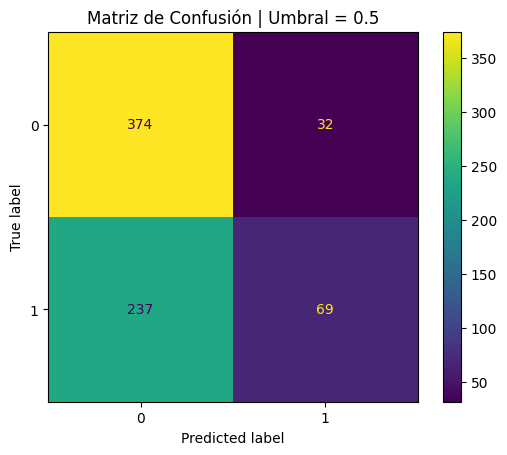

{'accuracy': 0.6221910112359551, 'precision': 0.6831683168316832, 'recall': 0.22549019607843138, 'f1_score': 0.33906633906633904}
Accuracy del modelo con corte 0.5:  0.6236831015592078
Precision del modelo con corte 0.5:  0.5645569620253165
Recall del modelo con corte 0.5:  0.23622881355932204
F1-Score del modelo con corte 0.5:  0.3330843913368185
Uso del 100% de los datos para entrenamiento y testeo


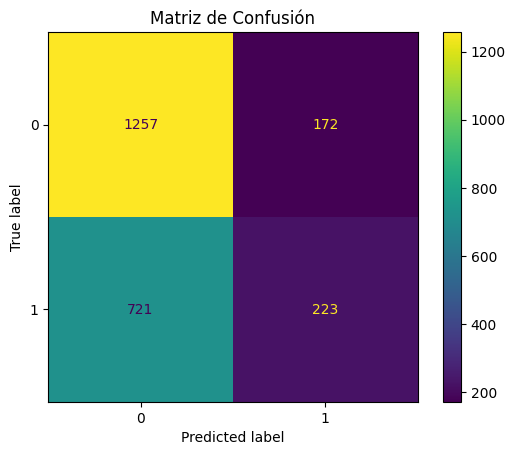

{'accuracy': 0.6236831015592078, 'precision': 0.5645569620253165, 'recall': 0.23622881355932204, 'f1_score': 0.3330843913368185}


In [7]:
# Define el tamaño del conjunto de prueba y el umbral
tamanio_test = 0.3  # 30% para test
umbral = 0.5 # Umbral para clasificación
# Llama a la función para entrenamiento
resultados_entrenamiento = bayes_conjunto_con_entrenamiento(tamanio_test, umbral)
print(resultados_entrenamiento)
# Llama a la función sin entrenamiento
resultados_sin_entrenamiento = bayes_conjunto_sin_entrenamiento(umbral)
print(resultados_sin_entrenamiento)

LDA
NUEVA OBSERVACION

Precisión del modelo LDA: 0.57
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       406
           1       0.00      0.00      0.00       306

    accuracy                           0.57       712
   macro avg       0.29      0.50      0.36       712
weighted avg       0.33      0.57      0.41       712



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/b

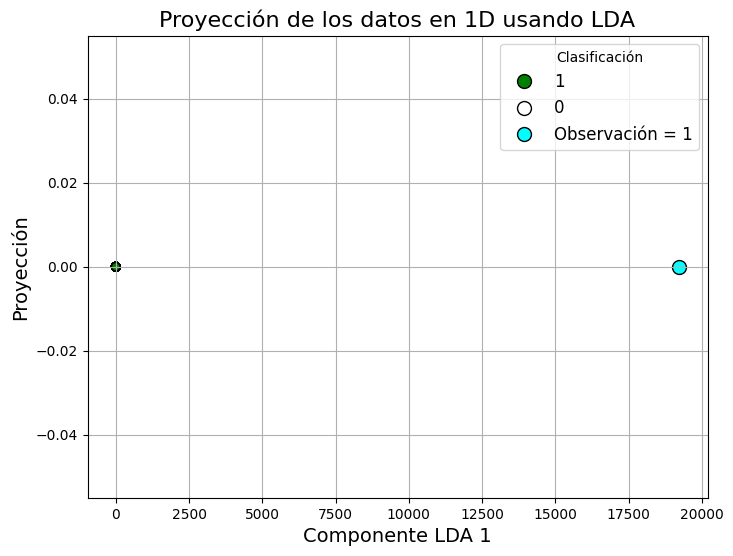

Accuracy: 0.57
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Matriz de Confusión:
 [[406   0]
 [306   0]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       406
           1       0.00      0.00      0.00       306

    accuracy                           0.57       712
   macro avg       0.29      0.50      0.36       712
weighted avg       0.33      0.57      0.41       712



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [13]:
new_observation = [1, 0.1, 230, 11, 14, 707, 2769, 33629]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo LDA
lda = LDA(n_components=1)  # Reducimos a 1 dimensión para la visualización

# Entrenar el modelo
lda.fit(X_train, y_train)

# Transformar los datos de entrenamiento usando LDA
X_train_lda = lda.transform(X_train)

# Hacer predicciones en el conjunto de prueba
y_pred = lda.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
accuracy_lda = accuracy
print(f'Precisión del modelo LDA: {accuracy:.2f}')

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(report)

# Visualización de los datos proyectados en el nuevo eje con paleta de verde
plt.figure(figsize=(8, 6))

# Graficar los puntos transformados con color verde según la clase (Outcome)
scatter = plt.scatter(X_train_lda[:, 0], np.zeros_like(X_train_lda),
                      c=np.where(y_train == 1, 'green', 'white'),
                      edgecolor='k')

# Graficar la nueva observación
new_observation = np.array(new_observation).reshape(1, -1)
new_observation_lda = lda.transform(new_observation)

# Predecir la clase de la nueva observación
prediccion = lda.predict(new_observation)[0]

# Cambia el color del nuevo punto (rojo en este caso)
plt.scatter(new_observation_lda[0, 0], 0, color='cyan', edgecolor='black', label='Nueva Observación', s=100)


# Crear una leyenda manualmente
unique_classes = np.unique(y_train)
handles = [
    plt.Line2D([0], [0], marker='o', color='w',
                markerfacecolor='green', markersize=10, markeredgecolor='k'),
    plt.Line2D([0], [0], marker='o', color='w',
                markerfacecolor='white', markersize=10, markeredgecolor='k'),
    plt.Line2D([0], [0], marker='o', color='w',
                markerfacecolor='cyan', markersize=10, markeredgecolor='k')
]
labels = ['1', '0', f'Observación = {prediccion}']
plt.legend(handles, labels, title='Clasificación', fontsize=12)

# Etiquetas y título
plt.title('Proyección de los datos en 1D usando LDA', fontsize=16)
plt.xlabel('Componente LDA 1', fontsize=14)
plt.ylabel('Proyección', fontsize=14)
plt.grid(True)

# Mostrar gráfico
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Hacer predicciones en el conjunto de prueba
y_pred = lda.predict(X_test)

# Evaluar las métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Cambiar a 'macro' o 'weighted' si hay más de dos clases
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Mostrar métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", cm)

# Reporte de clasificación completo
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(report)


LDA

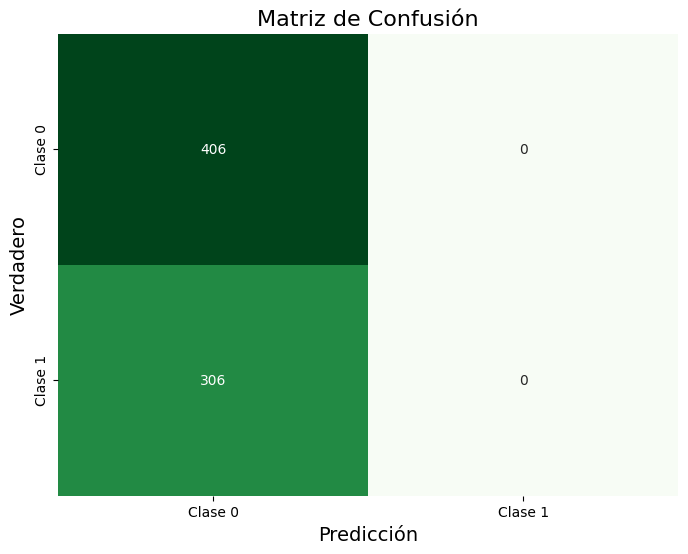

In [14]:
# Visualización de la matriz de confusión con paleta de colores verde
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
              xticklabels=['Clase 0', 'Clase 1'],
              yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión', fontsize=16)
plt.xlabel('Predicción', fontsize=14)
plt.ylabel('Verdadero', fontsize=14)
plt.show()

QDA

In [15]:
# Luego sigues con el escalado y la división del dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Tamaño de entrenamiento: {round(len(X_train) / len(X) * 100)}% \n\
Tamaño de prueba: {round(len(X_test) / len(X) * 100)}%")

Tamaño de entrenamiento: 70% 
Tamaño de prueba: 30%


In [16]:
qda = QDA()
qda.fit(X_train_scaled, y_train)
qda_preds = qda.predict(X_test_scaled)
qda_acc = accuracy_score(y_test, qda_preds)
qda_recall = recall_score(y_test, qda_preds)
qda_f1 = f1_score(y_test, qda_preds)

Accuracy: 0.6179775280898876
Precision: 0.67
Recall: 0.21895424836601307
F1 Score: 0.33004926108374383


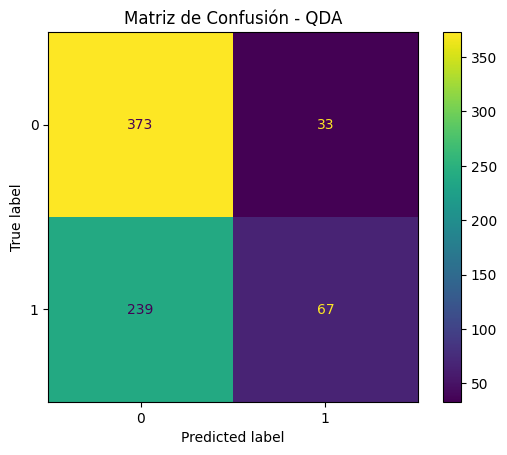

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calcular precisión, recall, y F1
precision_qda = precision_score(y_test, qda_preds)
recall_qda = recall_score(y_test, qda_preds)
f1_score_qda = f1_score(y_test, qda_preds)

# Matriz de Confusion QDA
qda_conf_mat = confusion_matrix(y_test, qda_preds)
accuracy_qda = accuracy_score(y_test, qda_preds)
fig_qda = ConfusionMatrixDisplay(confusion_matrix=qda_conf_mat)
fig_qda.plot(values_format='d')

# Imprimir métricas
print(f'Accuracy: {accuracy_qda}')
print(f'Precision: {precision_qda}')
print(f'Recall: {recall_qda}')
print(f'F1 Score: {f1_score_qda}')

plt.title('Matriz de Confusión - QDA')
plt.show()

REGRESION LOGISTICA

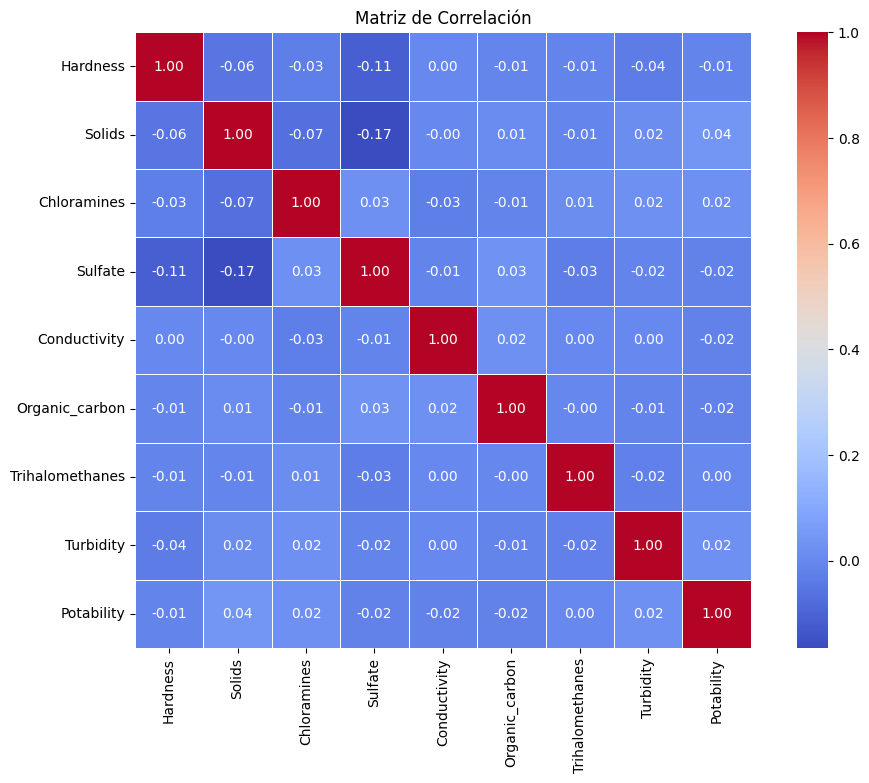

In [18]:
# Filtrar solo las columnas numéricas
numeric_data = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()


# Visualizar la matriz de correlación usando un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=.5)
plt.title('Matriz de Correlación')

plt.show()

In [19]:
# Dividir X y y en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=16)

In [20]:
# Instanciar el modelo de regresión logística
logreg = LogisticRegression(random_state=16, max_iter=200)  # Aumentar a 200 iteraciones

# Ajustar el modelo con los datos de entrenamiento
logreg.fit(X_train, y_train)

# Realizar predicciones
y_pred = logreg.predict(X_test)

In [21]:
# Calcular y mostrar la precisión
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.6f}')

#Precisión del Modelo
accuracy_rl = accuracy

# Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(cnf_matrix)

# Reporte de clasificación
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

Precisión del modelo: 0.586041
Matriz de Confusión:
[[487   3]
 [341   0]]
              precision    recall  f1-score   support

           0       0.59      0.99      0.74       490
           1       0.00      0.00      0.00       341

    accuracy                           0.59       831
   macro avg       0.29      0.50      0.37       831
weighted avg       0.35      0.59      0.44       831



grafico de regresion logistica

Text(0.5, 23.52222222222222, 'Etiqueta Predicha')

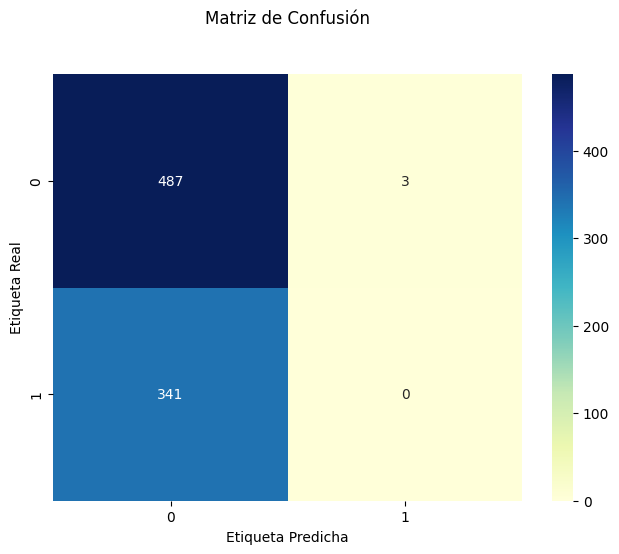

In [22]:
# Crear el heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')

SVM

In [23]:
# Si hay columnas categóricas en X, conviértelas a numéricas
accuracy_svm = 2408/2873
for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el rango de hiperparámetros C y gamma
param_grid = {
    'C': np.logspace(-2, 5, 10),     # Valores de C en el rango de 10^(-2) a 10^5
    'gamma': np.logspace(-2, 5, 10)  # Valores de gamma en el rango de 10^(-2) a 10^5
}

# Configurar la búsqueda en grid con validación cruzada
grid = GridSearchCV(
    estimator  = SVC(kernel='rbf'),  # Modelo SVM con kernel RBF
    param_grid = param_grid,         # Hiperparámetros a probar
    scoring    = 'accuracy',         # Métrica de evaluación: precisión
    n_jobs     = -1,                 # Usar todos los núcleos del CPU
    cv         = 3,                  # Validación cruzada con 3 folds
    verbose    = 0,                  # No mostrar detalles del proceso
    return_train_score = True        # Almacenar también el puntaje de entrenamiento
)


In [24]:
# Entrenar el modelo y realizar la búsqueda (Suele tardar mucho tiempo!!!)
_ = grid.fit(X=X_train.to_numpy(), y=y_train.to_numpy().flatten())

In [25]:
# Resultados de la búsqueda en grid
resultados = pd.DataFrame(grid.cv_results_)
mejores_resultados = resultados.filter(regex='(param.*|mean_t|std_t)') \
                               .drop(columns='params') \
                               .sort_values('mean_test_score', ascending=False) \
                               .head(5)

# Mostrar las mejores combinaciones
print(mejores_resultados)

# Mostrar el mejor modelo y los mejores hiperparámetros
mejor_modelo = grid.best_estimator_
mejor_C = grid.best_params_['C']
mejor_gamma = grid.best_params_['gamma']
mejor_puntaje = grid.best_score_

print(f"Mejor puntaje: {mejor_puntaje}")
print(f"Mejor C: {mejor_C}, Mejor gamma: {mejor_gamma}")

        param_C  param_gamma  mean_test_score  std_test_score  \
0      0.010000     0.010000         0.615894        0.000525   
63   464.158883     2.154435         0.615894        0.000525   
73  2782.559402     2.154435         0.615894        0.000525   
72  2782.559402     0.359381         0.615894        0.000525   
71  2782.559402     0.059948         0.615894        0.000525   

    mean_train_score  std_train_score  
0           0.615894         0.000262  
63          1.000000         0.000000  
73          1.000000         0.000000  
72          1.000000         0.000000  
71          1.000000         0.000000  
Mejor puntaje: 0.6158944864789584
Mejor C: 0.01, Mejor gamma: 0.01


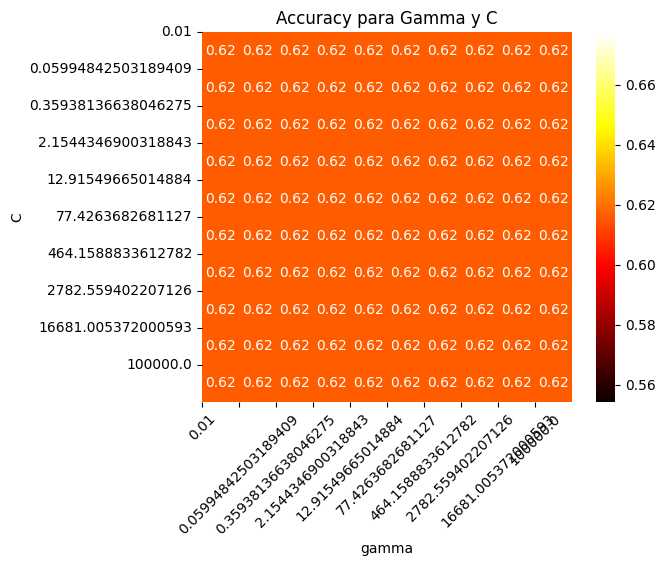

In [26]:
scores = grid.cv_results_["mean_test_score"].reshape(
    len(param_grid['gamma']),
    len(param_grid['C']))
# Heatmap
sns.heatmap(scores,
            cmap = plt.cm.hot,
            annot= True,
            cbar= True,
            square=True)

plt.xlabel("gamma")
plt.ylabel("C")
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'], rotation=45)
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'], rotation=0)

plt.title("Accuracy para Gamma y C")
plt.show()

SVM

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Matriz de confusión:
 [[406   0]
 [306   0]]


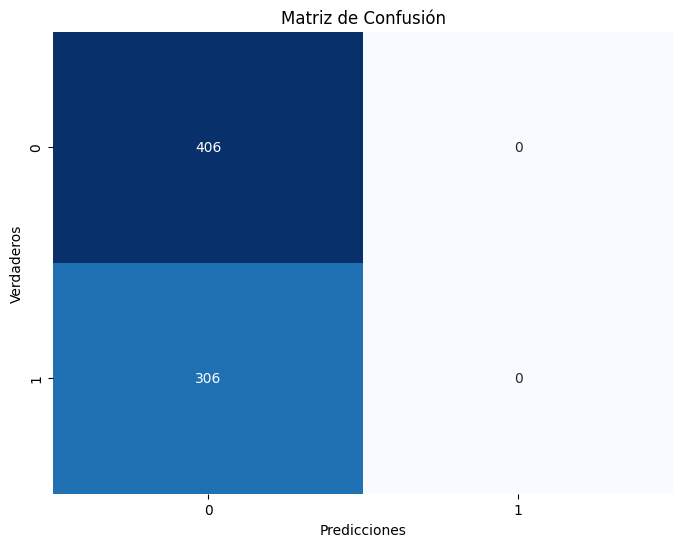

Accuracy: 0.57
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Realizar predicciones en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:\n", conf_matrix)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicciones')
plt.ylabel('Verdaderos')
plt.title('Matriz de Confusión')
plt.show()

# Calcular las métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Usa 'macro' o 'weighted' si hay más de 2 clases
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

# Mostrar las métricas
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


GRAFICOS

Precision de los modelos

In [28]:
print("La precisión de los modelos es De:")

print(accuracy_rl, "Regresión Logística")
print(accuracy_svm, "Maquina de Soporte Vectorial")
print(accuracy_qda, "Analisis de Discriminante Cuadrático")
print(accuracy_lda, "Analisis de Discriminante Lineal")
print(accuracy_b, "Teorema de Bayes")

La precisión de los modelos es De:
0.5860409145607701 Regresión Logística
0.8381482770623042 Maquina de Soporte Vectorial
0.6179775280898876 Analisis de Discriminante Cuadrático
0.5702247191011236 Analisis de Discriminante Lineal
0.6221910112359551 Teorema de Bayes
